# 11 Fundamentals of Analogisers' methods
*This notebook illustrates methods to implement tasks using analogisers' methods*
***
Alessandro Tufano, Ph.D. 2021

### Import Packages

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys; sys.path.insert(0, '..') #add the above level with the package


from IPython.display import display, HTML


#import data
from sklearn.datasets import load_breast_cancer
#Load the dataset
data = load_breast_cancer()

# define X dataframe
X = data.data
X = pd.DataFrame(X)

# define y dataframe
y = data.target
y = pd.DataFrame(y,columns=['target'])


### Hyperparameters gridsearch and fit linear models

In [2]:
from analogistics.learning.analogizers_grids import GridSearchAnalogizer

grid_search = GridSearchAnalogizer()
D_res_regr = grid_search.train_models_classification(X, y)
D_res_regr

Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.90813648        nan 0.9160105         nan 0.90813648
        nan 0.79790026]
  category=UserWarning
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,MODEL_NAME,MODEL,PARAMS,SCORE_TEST,ACCURACY,PRECISION,RECALL,F1,REPORT
0,svm,"SVC(C=10, gamma=0.0001)","{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}",0.934383,0.962766,0.962699,0.962766,0.962703,Empty DataFrame Columns: [] Index: []
0,svm_linear,LinearSVC(C=10),"{'C': 10, 'penalty': 'l2'}",0.916010,0.957447,0.960086,0.957447,0.956777,Empty DataFrame Columns: [] Index: []


### Evaluate the best model

In [3]:
#Split into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#retrieve the best model from the grid search
best_model = D_res_regr.iloc[0]['MODEL']
best_model

y_pred = best_model.predict(x_test)

### Accuracy

In [4]:
score = best_model.score(x_test, y_test)
print(f"Accuracy: {score}")

Accuracy: 0.9790209790209791


### Confusion matrix

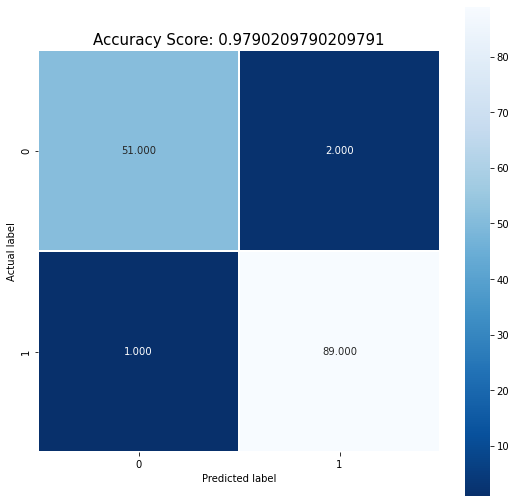

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

#define the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

#plot the confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Area under the ROC curve

AUC: 0.9755765199161426


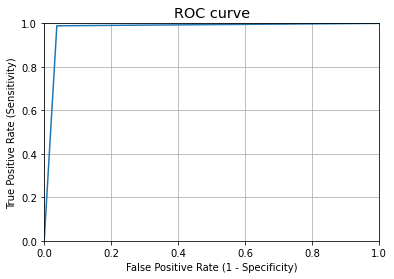

In [6]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# calculate the AUC
print(f"AUC: {metrics.roc_auc_score(y_test, y_pred)}")

### Feature relevance

In [7]:
#Print coefficients only using SVM with linear kernel
#create a dataframe with one row for each feature of X
features_list = list(X.columns)
D_assessment = pd.DataFrame(features_list,columns=['feature_name'])

#extract coefficients
coefficients = list(best_model.coef_[0])
D_assessment['coefficients'] = coefficients


display(HTML(D_assessment.to_html()))
plt.bar(D_assessment['feature_name'],D_assessment['coefficients'])
plt.xlabel('Feature name')
plt.ylabel('Coefficient value')
plt.title('LDA coefficients')




AttributeError: coef_ is only available when using a linear kernel